In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
import numpy as np

def move_is_correct(grid,num):
    '''
    @param grid: 6x7 grid containing the current game state
    @param num: column

    returns True if move is allowed on that column
    '''

    #if 0 is in column
    if 0 in grid[:,num]:
    
        #move is allowed
        return True

    else:

        return False

def move_still_possible(S):
    '''
    @param S: 6x7 grid containing the current game state
    returns True if grid contains no 0, therefore no move possible anymore
    '''
    return not(S[S==0].size == 0)


def move(S,p,col_num):
    '''
    @param S: 6x7 grid containing the current game state
    @param p: current player
    @param col_num: column number
    
    sets the player's number on the grid and returns the grid
    '''
    
    #sanity check
    if 0 in S[:,col_num]:    
        y = np.where(S[:,col_num]==0)[0][-1]
        S[y,col_num] = p
        return S , y, col_num
    else:
        return S, None, None
        return 

def move_at_random(S):
    '''
    @param S: 6x7 grid containing the current game state
    moves at random
    '''
    return np.random.randint(0,S.shape[1])


#neat and ugly but the fastest way to search a matrix for a vector is a string find
player1 = '1 1 1 1'
oponent = '2 2 2 2'

def move_was_winning_move(S, p):
    '''
    @param S: 6x7 grid containing the current game state
    @param p: current player
    
    combines all the allowed formations of the grid and string_finds with 
    the currents player vector. Returns true if match.
    '''
    if p == 1:
        match = player1
    else:
        match = oponent 

    l=[]
    #for every possible diag
    for i in range(-2,4):
        l.append(np.diag(S,k = i))
        l.append(np.diag(np.fliplr(S),k=i))
    #left to right
    l.append(S)
    #top to bottom
    l.append(np.rot90(S)) 

    if ''.join(np.array_str(e) for e in l).find(match) > -1:
        return True
    return False



# relate numbers (1, -1, 0) to symbols ('x', 'o', ' ')
symbols = {1:'b', 2:'r', 0:' '}

# print game state matrix using symbols
def print_game_state(S):
    B = np.copy(S).astype(object)
    for n in [1, 2, 0]:
        B[B==n] = symbols[n]
    print B





if __name__ == '__main__':
    
    # initialize array that counts how often a cell contributed to a win
    final = np.zeros((6,7), dtype = float)  
    outcomes = []
    
    for i in range(2000):
        # initialize 6x7 connectfour board
        gameState = np.zeros((6,7), dtype=int)

        # initialize player number, move counter
        player = 1
        mvcntr = 1

        # initialize flag that indicates win
        noWinnerYet = True


        while move_still_possible(gameState) and noWinnerYet:
            
            while True:
                # get player symbol
                name = symbols[player]
                #print '%s moves' % name
                
                # let player move at random
                col_num = move_at_random(gameState)
                if move_is_correct(gameState, col_num):
                    gameState, _ , _ = move(gameState,player,col_num)

                    #print current game state
                    #print_game_state(gameState)

                    # evaluate game state
                    if move_was_winning_move(gameState, player):
                        #print 'player %s wins after %d moves' % (name, mvcntr)

                        # determine who won
                        winner = player
                        # get the positions of the fields the winner selected
                        xp, yp = np.where(gameState == winner)
                        # update "final" which counts how often a cell contributed
                        # to a win
                        final[xp,yp] +=1
                        #for i in range(0, len(xp)):
                        #    final[xp[i], yp[i]] += 1
                
                        noWinnerYet = False
                        
                        #add to outcomes list which winner
                        outcomes.append(player)

                    # switch player and increase move counter
                    if player == 1:
                        player = 2
                    else :
                        player = 1

                    mvcntr +=  1
                
                    break

        if noWinnerYet:
            #0 for draw
            outcomes.append(0)
            #print 'game ended in a draw' 
            
    print 'Finished'
    
    # normalize the count data and store it on disk
    normed_final = final / np.sum(final, dtype=np.float)
    print normed_final
    np.savetxt("normed_count.csv", normed_final, delimiter=",")


Finished
[[ 0.00497489  0.0057653   0.00590478  0.00478892  0.00432397  0.00534685
   0.00553282]
 [ 0.01083318  0.01008927  0.00957783  0.00934536  0.0098103   0.00911289
   0.00990329]
 [ 0.01869072  0.02022503  0.02008555  0.01994607  0.01952762  0.01915566
   0.02017854]
 [ 0.02594383  0.028687    0.02877999  0.03054677  0.02854752  0.02645527
   0.02389808]
 [ 0.0327785   0.03631207  0.03910173  0.04021759  0.03821834  0.03301097
   0.03291798]
 [ 0.03989213  0.0417984   0.04565743  0.05439836  0.04649433  0.04244932
   0.04077553]]


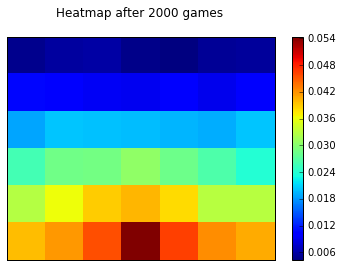

In [47]:
data = normed_final
fig, ax = plt.subplots()
heatmap = ax.pcolor(data)
cbar = plt.colorbar(heatmap)
ax.set_xticks([])
ax.set_yticks([])

ax.invert_yaxis()

plt.title('Heatmap after 2000 games \n')
plt.show()

look how nicely distributed our table is

## Tournament Random vs Random

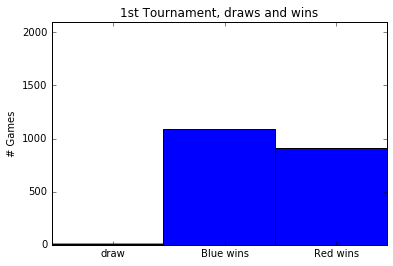

In [46]:
his = plt.hist(outcomes,bins=3)
offset = -.3
plt.title("1st Tournament, draws and wins")
#plt.xlabel("left: o wins, middle: draw, right: x wins")
plt.ylabel("# Games") 
axes = plt.gca()
axes.set_ylim([0,2100]) # y axis should include all 2000 games
axes.set_xlim([0,2.0])
axes.set_xticks(his[1][1:]+offset)
axes.set_xticklabels( ('draw', 'Blue wins', 'Red wins') )   